In [26]:
from keras.datasets import fashion_mnist

In [27]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [28]:
x_train=x_train/255.0
x_test=x_test/2550
import numpy as np 
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)

In [29]:
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization
model=Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',metrics=['accuracy'],loss='sparse_categorical_crossentropy')
model.summary()
          

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                      

In [30]:
history = model.fit(x_train,y_train,epochs=15,validation_split=0.2,batch_size=32)

Epoch 1/15
1500/1500 [==============================] - 68s 45ms/step - loss: 0.4659 - accuracy: 0.8296 - val_loss: 0.3790 - val_accuracy: 0.8615
Epoch 2/15
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3285 - accuracy: 0.8796 - val_loss: 0.3321 - val_accuracy: 0.8758
Epoch 3/15
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2847 - accuracy: 0.8944 - val_loss: 0.3291 - val_accuracy: 0.8790
Epoch 4/15
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2479 - accuracy: 0.9079 - val_loss: 0.3168 - val_accuracy: 0.8825
Epoch 5/15
1500/1500 [==============================] - 81s 54ms/step - loss: 0.2199 - accuracy: 0.9191 - val_loss: 0.2963 - val_accuracy: 0.8931
Epoch 6/15
1500/1500 [==============================] - 73s 49ms/step - loss: 0.1979 - accuracy: 0.9265 - val_loss: 0.3035 - val_accuracy: 0.8935
Epoch 7/15
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1771 - accuracy: 0.9351 - val_loss: 0.3249 -

In [31]:
loss,accuracy=model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 1.4596 - accuracy: 0.5714
1.4596308469772339
0.571399986743927


313/313 [==============================] - 4s 12ms/step


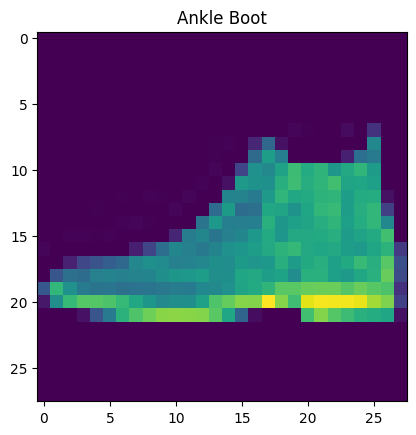

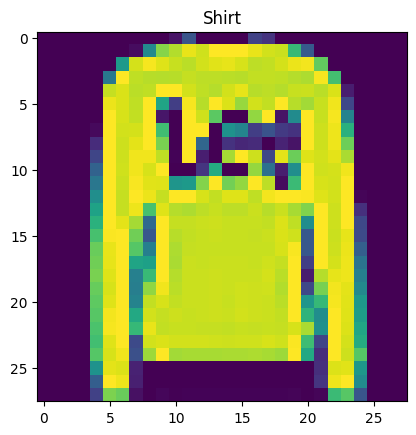

In [32]:
y_predict=model.predict(x_test)
import numpy as np 
import matplotlib.pyplot as plt 
labels=['Tshirt','Trouser','PullOver','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
for i in range(2):
    label=labels[np.argmax(y_predict[i])]
    plt.imshow(x_test[i])
    plt.title(label)
    plt.show()